# Diabetes Prediction
## Exploratory data analysis & Hypothesis testing

In [ ]:

import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv


# LOADING  LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data

In [3]:
data = pd.read_csv('/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv')
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [4]:
data.sample(6)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
59235,Female,47.0,0,0,never,29.09,6.2,126,0
1380,Female,66.0,0,0,ever,20.75,6.5,100,0
58614,Male,59.0,0,0,current,28.22,4.0,126,0
49552,Female,50.0,0,0,never,27.32,4.0,126,0
15532,Male,17.0,0,0,No Info,21.00,4.5,160,0
31544,Female,65.0,0,0,No Info,25.78,6.6,100,0


In [6]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [14]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


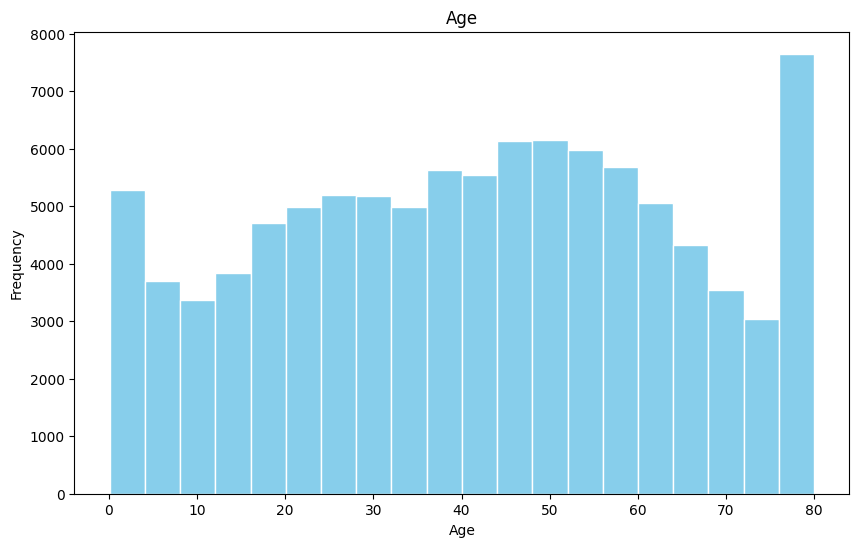

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(data['age'], bins=20, edgecolor='white', color='skyblue')
plt.title("Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

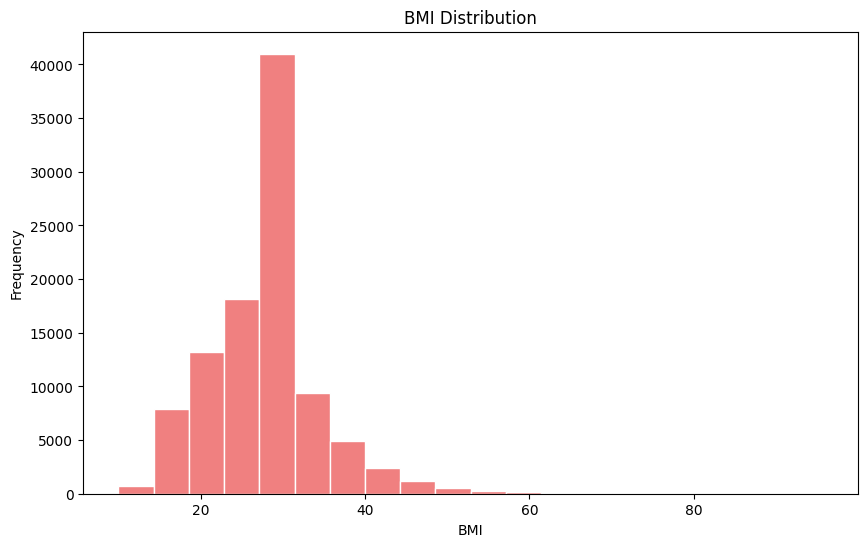

In [ ]:

plt.figure(figsize=(10, 6))
plt.hist(data['bmi'], bins=20, edgecolor='white', color='lightcoral')  
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()


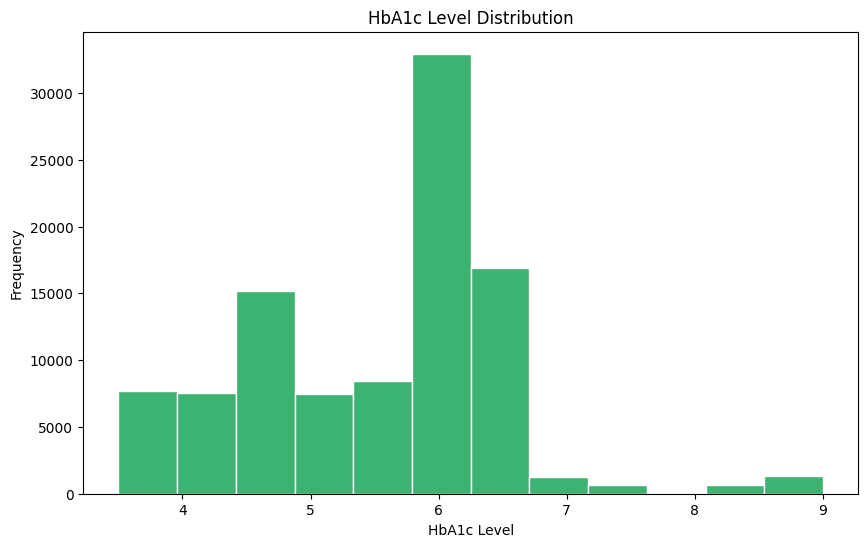

In [ ]:

plt.figure(figsize=(10, 6))
plt.hist(data['HbA1c_level'], bins=12, edgecolor='white', color='mediumseagreen') 
plt.title("HbA1c Level Distribution")
plt.xlabel("HbA1c Level")
plt.ylabel("Frequency")
plt.show()


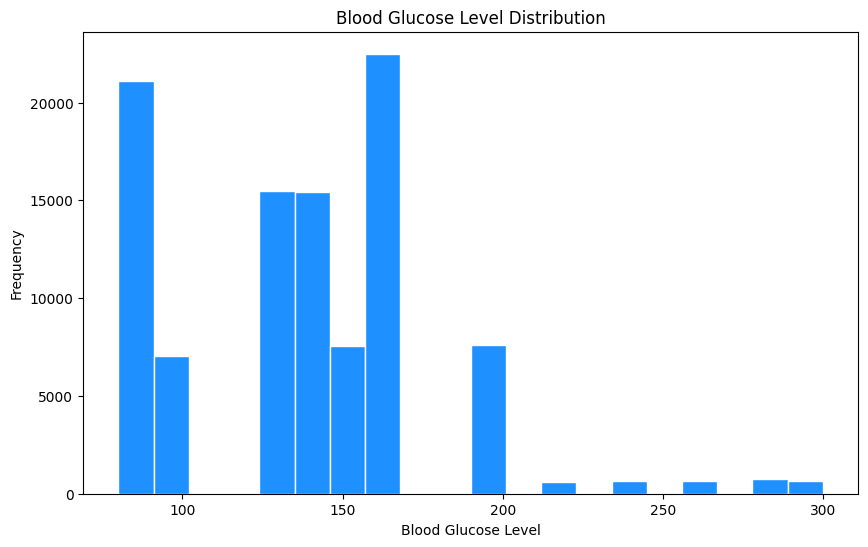

In [ ]:

plt.figure(figsize=(10, 6))
plt.hist(data['blood_glucose_level'], bins=20, edgecolor='white', color='dodgerblue') 
plt.title("Blood Glucose Level Distribution")
plt.xlabel("Blood Glucose Level")
plt.ylabel("Frequency")
plt.show()

In [ ]:
import pandas as pd
columns = list(data.columns)
columns_per_row = 10
for i in range(0, len(columns), columns_per_row):
    row = columns[i:i + columns_per_row]
    print(", ".join(row))


gender, age, hypertension, heart_disease, smoking_history, bmi, HbA1c_level, blood_glucose_level, diabetes


- gender, hypertension, heart_disease, smoking_history

- age, bmi, HbA1c_level, blood_glucose_level

**diabetes**


- **100000 Records, 8 features, 1 label:**
  - **Demographic Features**: `gender`, `age`
  - **Health Conditions**: `hypertension`, `heart_disease`, `smoking_history`
  - **Health Metrics**: `bmi`, `HbA1c_level`, `blood_glucose_level`
  - **Target Variable**: `diabetes`

# Data Exploration Slide Improvements

## Layout Improvements
- <span style="color:blue;">**Demographic Features**</span>: `gender`, `age`
- <span style="color:green;">**Health Conditions**</span>: `hypertension`, `heart_disease`, `smoking_history`
- <span style="color:orange;">**+ Health Metrics**</span>: `bmi`, `HbA1c_level`, `blood_glucose_level`
- <span style="color:red;">**Target Variable**</span>: `diabetes`


```diff
- This is red text
+ This is green text
! This is orange text
# This is gray text


- **<span style="color: darkblue;">100000 Records, 8 features, 1 label</span>:**
  - **Demographic Features**: <code style="color: #34A853;">gender</code>, <code style="color:  #007ACC;">age</code>
  - **Health Conditions**: <code style="color: #34A853;">hypertension</code>, <code style="color: #34A853;">heart_disease</code>, <code style="color: #34A853;">smoking_history</code>
  - **Health Metrics**: <code style="color: #007ACC;">bmi</code>, <code style="color: #007ACC;">HbA1c_level</code>, <code style="color: #007ACC;">blood_glucose_level</code>
  - **Target Variable**: <code style="color: red;">diabetes</code>


- **<span style="color: #1f3c88;">100000 Records, 8 features, 1 label</span>:**
  - **Demographic Features**: <code style="color: #007ACC;">gender</code>, <code style="color: #34A853;">age</code> 
  - **Health Conditions**: <code style="color: #DB4437;">hypertension</code>, <code style="color: #DB4437;">heart_disease</code>, <code style="color: #DB4437;">smoking_history</code>
  - **Health Metrics**: <code style="color: #FF9900;">bmi</code>, <code style="color: #FF9900;">HbA1c_level</code>, <code style="color: #FF9900;">blood_glucose_level</code>
  - **Target Variable**: <code style="color: #C21807;">diabetes</code>


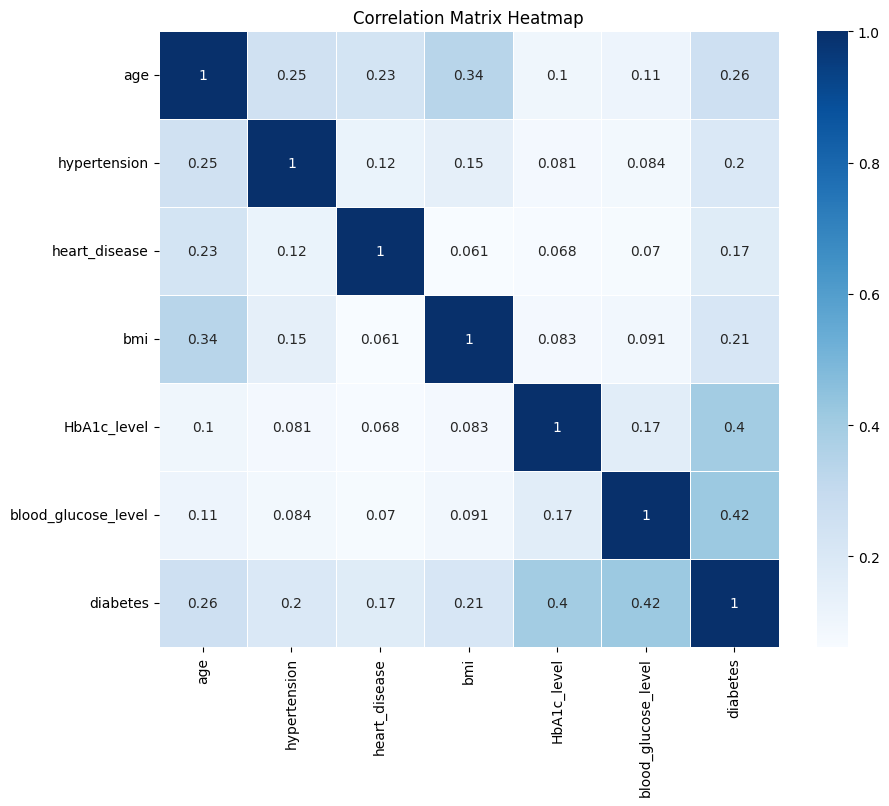

In [ ]:

numerical_data = data.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))  
sns.heatmap(numerical_data.corr(), annot=True, cmap='Blues', linewidths=0.5)

# Show the plot
plt.title('Correlation Matrix Heatmap')
plt.show()


### Correlation Analysis Summary

- **Target Variable (`diabetes`) Correlations**:
  - **`blood_glucose_level (0.42)`**, **`HbA1c_level (0.40)`**, **`age (0.26)`**,  **`bmi(0.21)`**, **`hypertension (0.20)`**, **`heart_disease (0.17)`**

- **Feature Relationships**:
  - **`age` and `bmi`**: Moderate positive correlation (`0.34`), indicating BMI tends to increase with age.
  - **`age` and `hypertension`**: Moderate correlation (`0.25`), as hypertension prevalence tends to rise with age.

- **Key Insights**:
  - **Strong Predictors**: `blood_glucose_level` and `HbA1c_level` are the strongest predictors of diabetes.
  - **Moderate Influence**: Features like `age`, `bmi`, `hypertension`, and `heart_disease` also contribute but are less strongly correlated.

- **Modeling Considerations**:
  - Focus on `blood_glucose_level`, `HbA1c_level`, `age`, and `bmi` for predictive modeling.
  - No significant multicollinearity observed, suggesting that feature interactions are generally manageable.


### Correlation Analysis Summary

- **<span style="color:#1f77b4;">Target Variable (`diabetes`) Correlations</span>**:
  - **<span style="color:#ff7f0e;">`blood_glucose_level (0.42)`</span>**, **<span style="color:#2ca02c;">`HbA1c_level (0.40)`</span>**, 
  - **<span style="color:#d62728;">`age (0.26)`</span>**,**<span style="color:#9467bd;">`bmi (0.21)`</span>**,  **<span style="color:#8c564b;">`hypertension (0.20)`</span>**, **<span style="color:#e377c2;">`heart_disease (0.17)`</span>**

- **<span style="color:#1f77b4;">Feature Relationships</span>**:
  - **<span style="color:#d62728;">`age`</span>** and **<span style="color:#9467bd;">`bmi`</span>**: Moderate positive correlation (`0.34`), indicating BMI tends to increase with age.
  - **<span style="color:#d62728;">`age`</span>** and **<span style="color:#8c564b;">`hypertension`</span>**: Moderate correlation (`0.25`), as hypertension prevalence tends to rise with age.


- **<span style="color:#1f77b4;">Target Variable (`diabetes`) Correlations</span>**:
  - **High Correlation**:
    - <code style="color:#ff7f0e;">blood_glucose_level (0.42)</code>, <code style="color:#2ca02c;">HbA1c_level (0.40)</code>
  - **Moderate Correlation**:
    - <code style="color:#d62728;">age (0.26)</code>, <code style="color:#9467bd;">bmi (0.21)</code>, <code style="color:#8c564b;">hypertension (0.20)</code>, <code style="color:#e377c2;">heart_disease (0.17)</code>





- **<span style="color:#1f77b4;">Feature Relationships (Multicollinearity??)</span>**:
  - **<code style="color:#d62728;">age</code>** and **<code style="color:#9467bd;">bmi</code>**: `0.34`, **<code style="color:#d62728;">age</code>** and **<code style="color:#8c564b;">hypertension</code>**: (`0.25`)

# Data Description


### 1. gender
- **Description**: Gender refers to the biological sex of the individual, which can impact their susceptibility to diabetes.
- **Categories**:
  - **Male**: 41%  (41,430)
  - **Female**: 59% (58,552)
  - **Other**: 0% (18)
- **Unique Values**: 3 (Male, Female, Other)
- **Most Common**: Female (59%)
- **Valid Records**: 100,000  

---

### 2. age
- **Description**: Age is an important factor, as diabetes is more commonly diagnosed in older adults. The age range in this dataset is 0–80.
- **Distribution** (Histogram):
  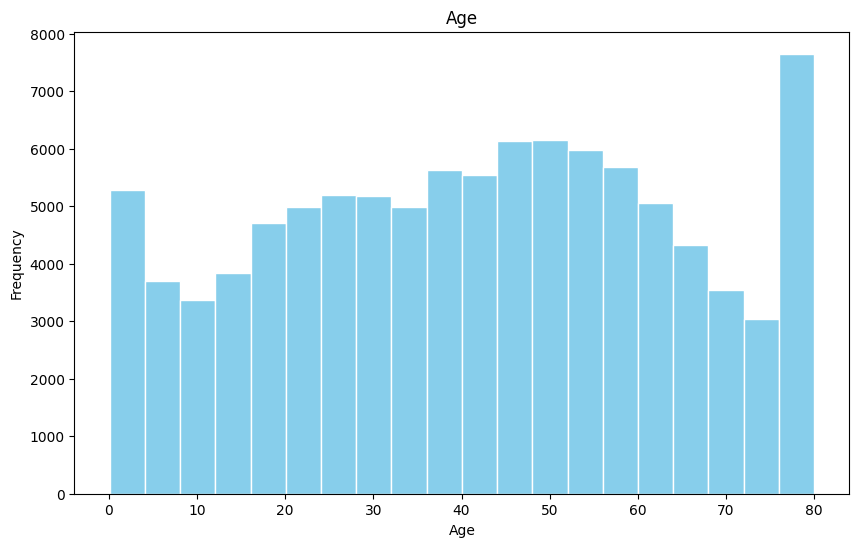
- **Statistics**:
  - **Mean**: 41.9  
  - **Standard Deviation**: 22.5  
  - **Quantiles**: 
    - Min: 0.08, 25%: 24, 50% (Median): 43, 75%: 60, Max: 80
- **Valid Records**: 100,000  
- **Mismatched**: 0  
- **Missing**: 0

---

### 3. hypertension
- **Description**: Indicates if the individual has hypertension, a condition of persistently elevated blood pressure.
- **Categories**:
  - 0: No (92,515 records)
  - 1: Yes (7,485 records)
- **Valid Records**: 100,000   
- **Missing**: 0

---

### 4. heart_disease
- **Description**: Indicates if the individual has heart disease.
- **Categories**:
  - 0: No (96,058 records)
  - 1: Yes (3,942 records)
- **Valid Records**: 100,000  
- **Mismatched**: 0  
- **Missing**: 0

---

### 5. smoking_history
- **Description**: Smoking history is a risk factor for diabetes and complications.
- **Categories**:
  - **No Info**: 35,816  
  - **never**: 35,095
  - **former**: 9,352
  - **current**: 9,286
  - **not current**: 6,447
  - **ever**: 4,004  
- **Unique Values**: 6  
- **Most Common**: No Info (36%)
- **Valid Records**: 100,000  
- **Missing**: 0

---

### 6. bmi
- **Description**: BMI (Body Mass Index) is a measure of body fat based on weight and height. Higher BMI values are linked to a higher risk of diabetes. The range of BMI in the dataset is from 10.16 to 71.55. BMI less than 18.5 is underweight, 18.5-24.9 is normal, 25-29.9 is overweight, and 30 or more is obese.   
- **Distribution**:
  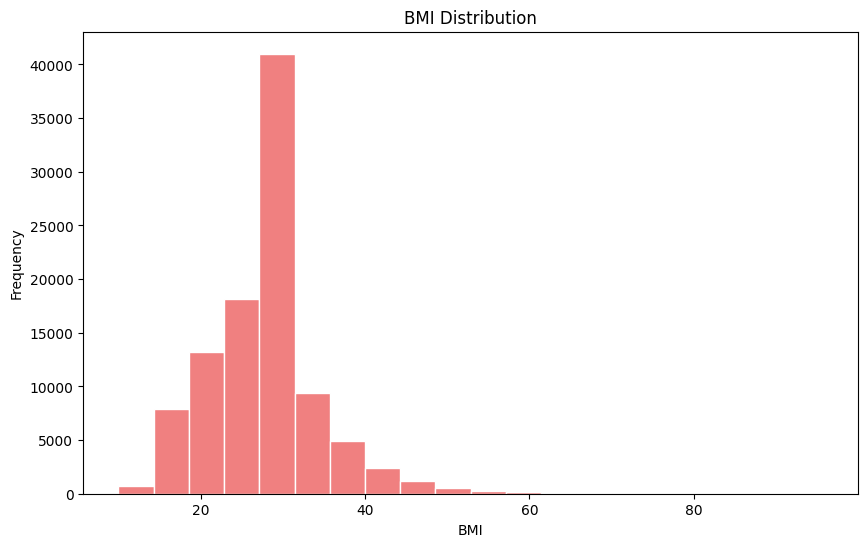
- **Statistics**:
  - **Mean**: 27.3  
  - **Standard Deviation**: 6.64  
  - **Quantiles**: Min: 10, 25%: 23.6, 50% (Median): 27.3, 75%: 29.6, Max: 95.7
- **Valid Records**: 100,000   
- **Missing**: 0

---

### 7. HbA1c_level
- **Description**: HbA1c (Hemoglobin A1c) level is an indicator of blood sugar over the past 2-3 months. Mostly more than 6.5% of HbA1c Level indicates diabetes.
- **Distribution**:
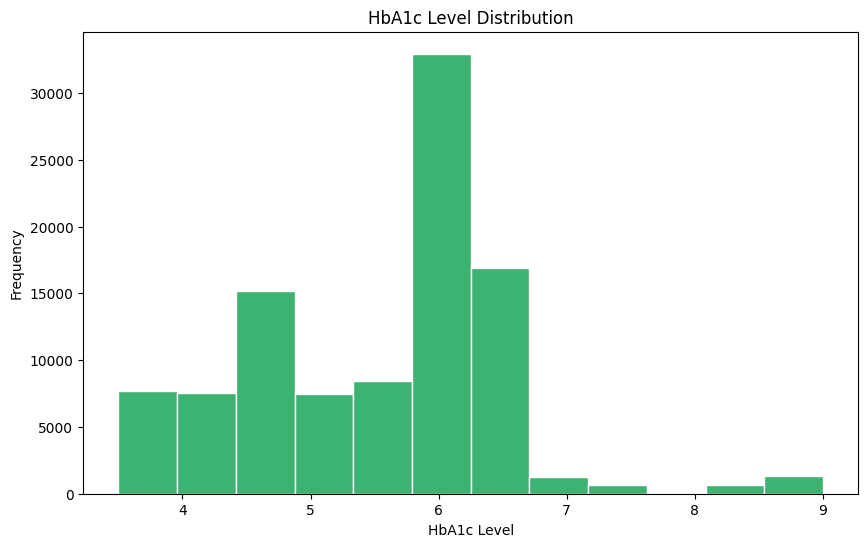
- **Statistics**:
  - **Mean**: 5.53  
  - **Standard Deviation**: 1.07  
  - **Quantiles**: Min: 3.5, 25%: 4.8, 50% (Median): 5.8, 75%: 6.2, Max: 9
- **Valid Records**: 100,000  
- **Mismatched**: 0  
- **Missing**: 0

---

### 8. blood_glucose_level
- **Description**: Indicates the amount of glucose in the blood; high levels are a diabetes indicator.
- **Distribution**:
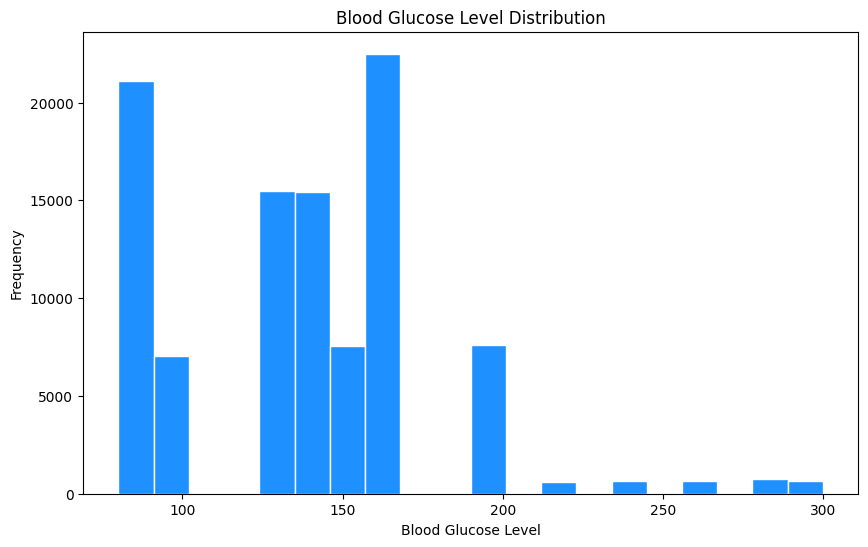
- **Statistics**:
  - **Mean**: 138  
  - **Standard Deviation**: 40.7  
  - **Quantiles**: Min: 80, 25%: 100, 50% (Median): 140, 75%: 159, Max: 300
- **Valid Records**: 100,000   
- **Missing**: 0

---

### 9. diabetes (Label)
- **Description**:  Indicates if the individual has diabetes.
- **Categories**:
  - 0: No diabetes (91,500 records)
  - 1: Diabetes (8,500 records)
- **Valid Records**: 100,000  
- **Missing**: 0
